# Hough Transform to identify a line

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import numpy as np
import cv2 as cv
import math
from numpy import unravel_index

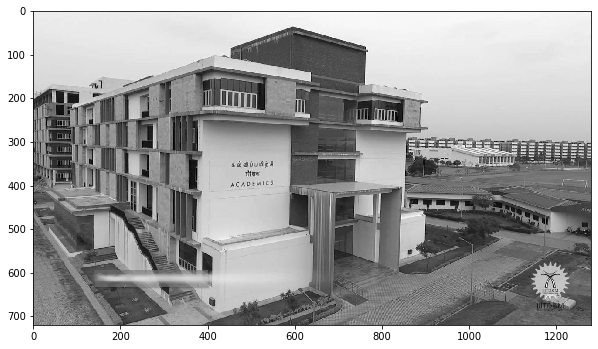

In [2]:
img = cv.imread('iiitdm.jpg' , cv.IMREAD_GRAYSCALE)

fig(figsize=(10, 10))
plt.imshow(img,cmap = 'gray')
plt.show()

Crop the image to remove the blur and logo. 

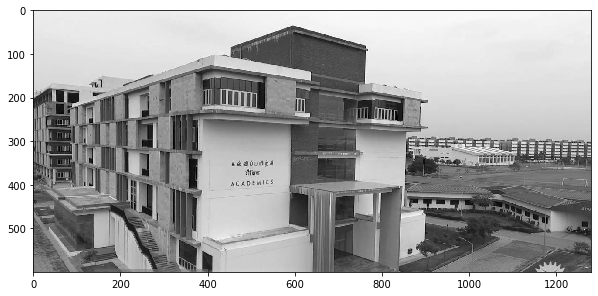

In [3]:
img_crop = img[0:600]

fig(figsize=(10, 10))
plt.imshow(img_crop,cmap = 'gray')
plt.show()

### Canny filter to identify edges

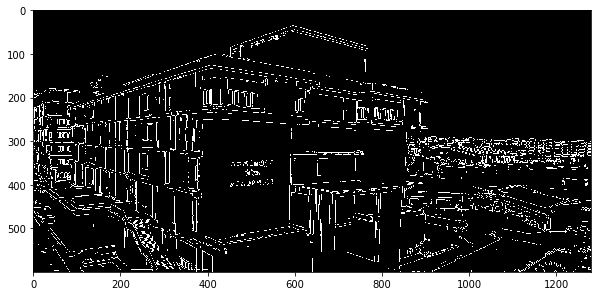

In [4]:
img_edge = cv.Canny(img_crop,150,200)

fig(figsize=(10, 10))
plt.imshow(img_edge,cmap = 'gray')
plt.show()

#### Diag will be the maximum value 'd' can assume

In [5]:
diag = round(math.sqrt((img_edge.shape[0]*img_edge.shape[0]) + (img_edge.shape[1]*img_edge.shape[1])))

In [6]:
accum = np.zeros((diag,360)) # Matrix to store the votes

for x in range(img_edge.shape[1]):
    for y in range(img_edge.shape[0]):
        
        if img_edge[y][x] == 255:
            
            for theta in range(360):
                
                d = (x*math.cos(theta)) + (y*math.sin(theta))
                d = round(d)
                accum[d,theta] = accum[d,theta] + 1

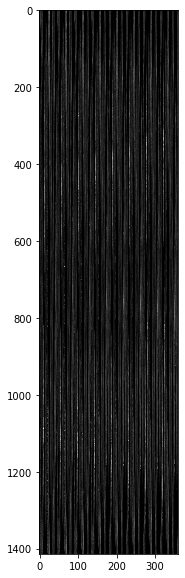

In [7]:
fig(figsize=(10, 10))
plt.imshow(accum,cmap = 'gray')
plt.show()

### Detect the strongest edge

In [8]:
max_ind = unravel_index(accum.argmax(), accum.shape)
d = max_ind[0]
theta = max_ind[1]

cos = math.cos(theta)
sin = math.sin(theta)

x1 = 0
y1 = int((d - (x1*cos))/(sin+0.000001))

x2 = 1000
y2 = int((d - (x2*cos))/(sin+0.00001))

img_final = img_crop.copy()

cv.line(img_final,(x1,y1),(x2,y2),(255,255,255),2)

array([[236, 236, 236, ..., 246, 246, 246],
       [236, 236, 236, ..., 246, 246, 246],
       [236, 236, 236, ..., 246, 246, 246],
       ...,
       [134, 134, 133, ...,  84,  81,  78],
       [134, 134, 133, ...,  86,  87,  88],
       [131, 130, 130, ...,  73,  79,  86]], dtype=uint8)

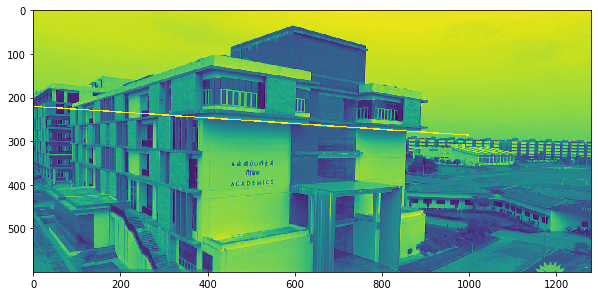

In [9]:
fig(figsize=(10, 10))
plt.imshow(img_final)
plt.show()

## Using inbuilt OpenCV function HoughLines

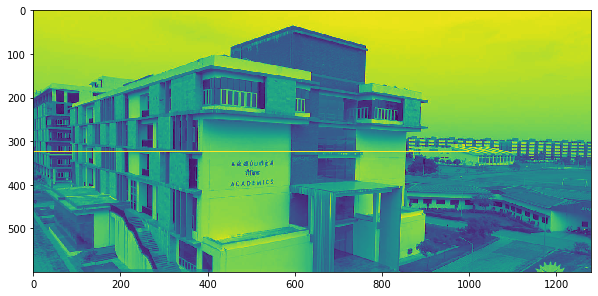

In [29]:
img_final2 = img_crop.copy()

edges = cv.Canny(img_crop,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,200)

for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img_final2,(x1,y1),(x2,y2),(255,255,255),2)

fig(figsize=(10, 10))
plt.imshow(img_final2)
plt.show()